<a href="https://colab.research.google.com/github/SainathReddy22/Tamato-disease-image-processing/blob/master/Tamato_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi


Wed Sep 23 13:46:15 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.66       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P8    10W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!pip install tensorflow-gpu

In [3]:
import tensorflow as tf
tf.__version__

'2.3.0'

In [4]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob


Image input should be 224 X 224

In [5]:
IMAGE_SIZE = [224, 224]
train_path = '/content/drive/My Drive/New Plant Diseases Dataset(Augmented)/train'
valid_path = '/content/drive/My Drive/New Plant Diseases Dataset(Augmented)/valid'

Importing imagenet weights for the inception v3


In [6]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [7]:
for layer in inception.layers:
    layer.trainable = False

No of output Classes

In [8]:
folders = glob("/content/drive/My Drive/New Plant Diseases Dataset(Augmented)/train/*")

In [9]:
x = Flatten()(inception.output)

In [10]:

prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=inception.input, outputs=prediction)

In [11]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [12]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/New Plant Diseases Dataset(Augmented)/train',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 18346 images belonging to 10 classes.


In [15]:
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/New Plant Diseases Dataset(Augmented)/valid',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')


Found 4585 images belonging to 10 classes.


In [16]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
1147/1147 [==============================] - 251s 219ms/step - loss: 4.1869 - accuracy: 0.6743 - val_loss: 2.9035 - val_accuracy: 0.7740
Epoch 2/10
1147/1147 [==============================] - 249s 217ms/step - loss: 3.2386 - accuracy: 0.7891 - val_loss: 3.1152 - val_accuracy: 0.8046
Epoch 3/10
1147/1147 [==============================] - 247s 216ms/step - loss: 3.3575 - accuracy: 0.8166 - val_loss: 3.0863 - val_accuracy: 0.8292
Epoch 4/10
1147/1147 [==============================] - 248s 216ms/step - loss: 3.2085 - accuracy: 0.8373 - val_loss: 3.6772 - val_accuracy: 0.8273
Epoch 5/10
1147/1147 [==============================] - 247s 215ms/step - loss: 3.0086 - accuracy: 0.8531 - val_loss: 3.7001 - val_accuracy: 0.8325
Epoch 6/10
1147/1147 [==============================] - 246s 215ms/step - loss: 2.8532 - accuracy: 0.8665 - val_loss: 2.9705 - val_accuracy: 0.8663
Epoch 7/10
1147/1147 [==============

In [17]:

import matplotlib.pyplot as plt


plotting loss


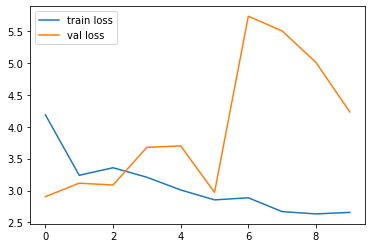

<Figure size 432x288 with 0 Axes>

In [18]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

Plotting accuracy


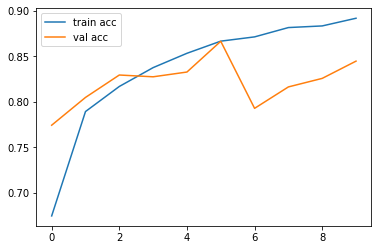

<Figure size 432x288 with 0 Axes>

In [19]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [20]:
from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [21]:
y_pred = model.predict(test_set)

In [22]:
y_pred

array([[0.0000000e+00, 8.3614897e-33, 6.7420896e-32, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 5.3025477e-02, 5.7523210e-19, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 7.9978077e-26, 4.3695023e-10, ..., 0.0000000e+00,
        0.0000000e+00, 1.2447185e-37]], dtype=float32)